In [1]:
import os
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import warnings
import seaborn as sns
import cv2
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam

warnings.filterwarnings("ignore")


# Define the path to the dataset
base_dir = '/kaggle/input/brain-cancer-detection-mri-images/Dataset'
tumor_dir = os.path.join(base_dir, 'tumor')
healthy_dir = os.path.join(base_dir, 'healthy')

# Get the list of images
tumor_images = os.listdir(tumor_dir)
healthy_images = os.listdir(healthy_dir)

print(f"Number of tumor images: {len(tumor_images)}")
print(f"Number of healthy images: {len(healthy_images)}")


Number of tumor images: 392
Number of healthy images: 408


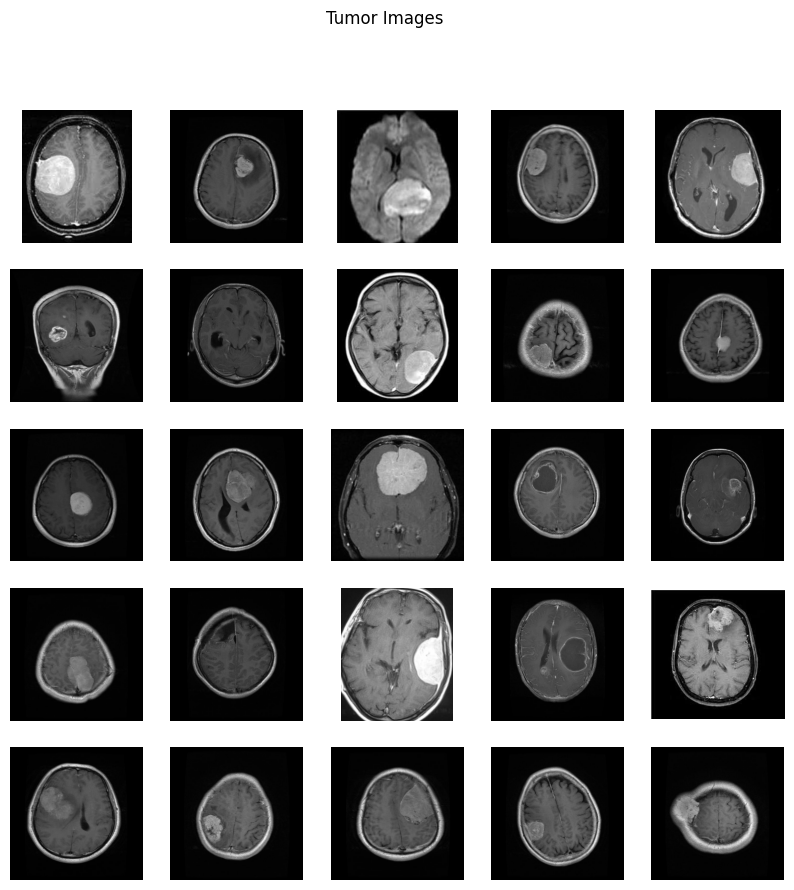

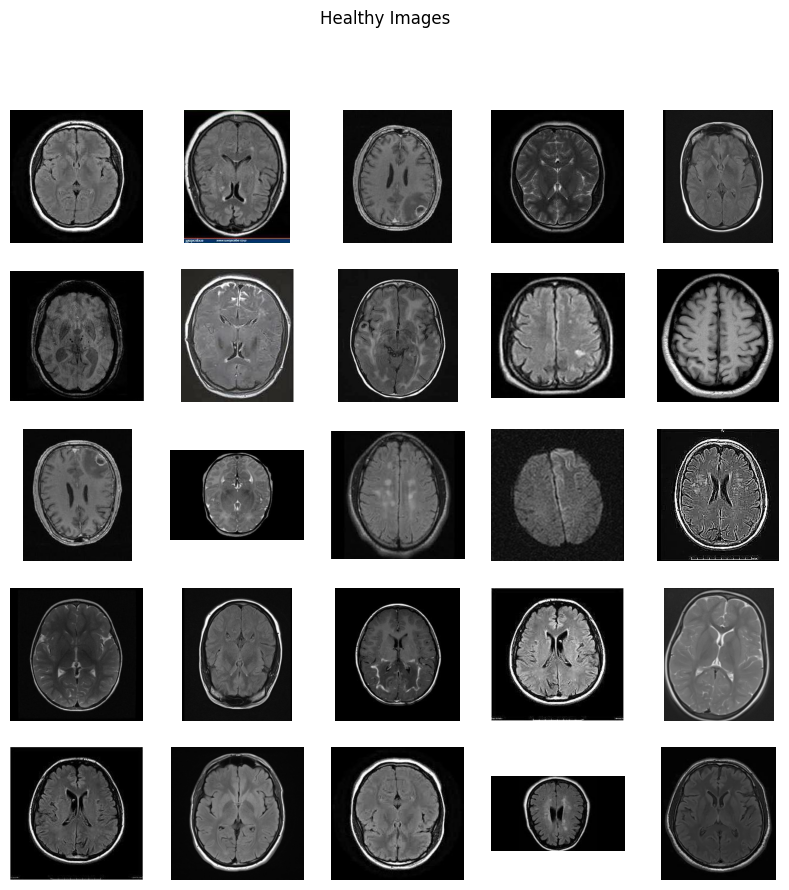

In [2]:
def plot_images(img_paths, title):
    plt.figure(figsize=(10, 10))
    for i, img_path in enumerate(img_paths):
        plt.subplot(5, 5, i + 1)
        img = plt.imread(img_path)
        plt.imshow(img, cmap='gray')
        plt.axis('off')
    plt.suptitle(title)
    plt.show()

# Plot tumor images
plot_images([os.path.join(tumor_dir, img) for img in tumor_images[:25]], title='Tumor Images')

# Plot healthy images
plot_images([os.path.join(healthy_dir, img) for img in healthy_images[:25]], title='Healthy Images')


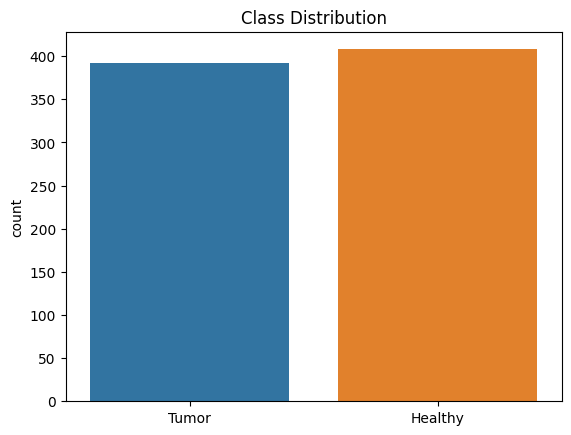

In [3]:
sns.countplot(x=['Tumor']*len(tumor_images) + ['Healthy']*len(healthy_images))
plt.title('Class Distribution')
plt.show()


In [4]:
tumor_img_shape = [plt.imread(os.path.join(tumor_dir, img)).shape for img in tumor_images]
healthy_img_shape = [plt.imread(os.path.join(healthy_dir, img)).shape for img in healthy_images]

print(f"Unique tumor image shapes: {set(tumor_img_shape)}")
print(f"Unique healthy image shapes: {set(healthy_img_shape)}")


Unique tumor image shapes: {(320, 257, 3), (342, 323, 3), (216, 216, 3), (341, 315, 3), (249, 206, 3), (251, 205, 3), (340, 507, 3), (236, 213, 3), (365, 306, 3), (442, 442, 3), (605, 507, 3), (270, 250, 3), (554, 554, 3), (212, 238, 3), (225, 225, 3), (527, 552, 3), (512, 512), (354, 318, 3), (326, 273, 3), (241, 209, 3), (340, 291, 3), (522, 513, 3), (216, 224, 3), (359, 300, 3), (252, 200, 3), (354, 298, 3), (258, 300, 3), (650, 591, 3), (500, 455, 3), (218, 180, 3), (993, 825, 3), (234, 216, 3), (581, 528, 3), (235, 214, 3), (331, 272, 3), (512, 512, 3), (239, 211, 3), (306, 278, 3), (480, 480, 3), (1427, 1275, 3), (237, 213, 3), (325, 254, 3), (336, 264, 3), (546, 472, 3), (337, 305, 3), (306, 306, 3), (216, 214, 3), (251, 201, 3), (235, 200, 3), (234, 215, 3), (223, 202, 3), (249, 204, 3), (456, 374, 3), (243, 208, 3), (223, 226, 3), (446, 450, 3)}
Unique healthy image shapes: {(263, 236, 3), (444, 468, 3), (243, 236, 3), (530, 380, 3), (512, 434, 3), (252, 236, 3), (250, 201, 3)

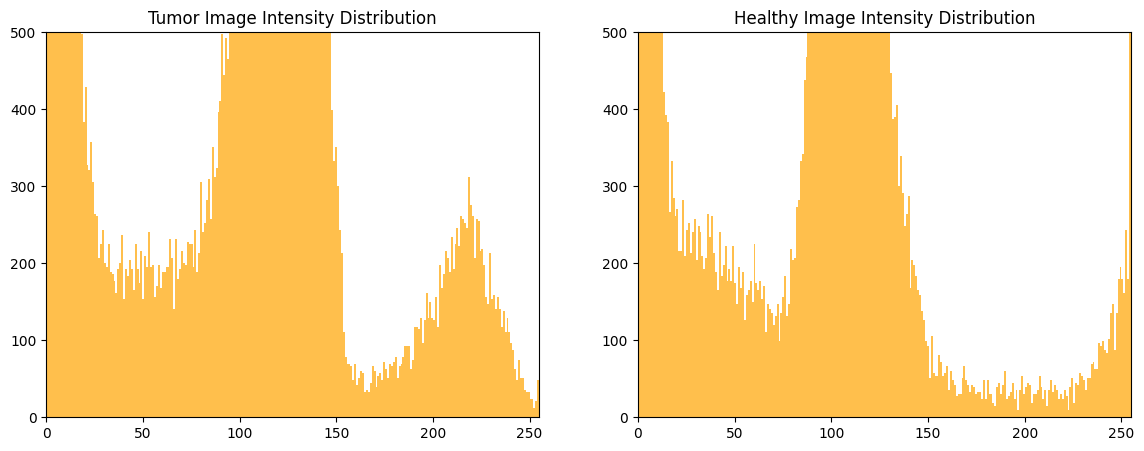

In [5]:
def plot_histogram(img_path, ax, title):
    img = plt.imread(img_path)
    # If the image is in grayscale, img will have only two dimensions
    ax.hist(img.ravel(), bins=256, color='orange', alpha=0.7)
    ax.set_xlim(0, 255)  # Assuming 8-bit grayscale images
    ax.set_ylim(0, 500)
    ax.set_title(title)

fig, axs = plt.subplots(1, 2, figsize=(14, 5))
plot_histogram(os.path.join(tumor_dir, tumor_images[0]), axs[0], 'Tumor Image Intensity Distribution')
plot_histogram(os.path.join(healthy_dir, healthy_images[0]), axs[1], 'Healthy Image Intensity Distribution')
plt.show()


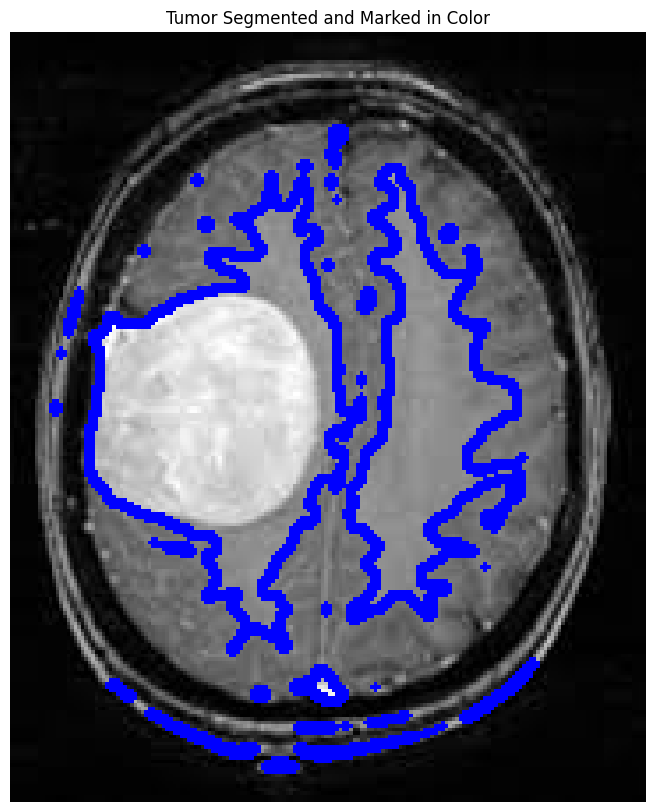

In [6]:

# Load the grayscale MRI image
img_path = os.path.join(tumor_dir, tumor_images[0])
img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)

blurred = cv2.GaussianBlur(img, (5, 5), 0)

_, thresholded = cv2.threshold(blurred, 127, 255, cv2.THRESH_BINARY)

contours, _ = cv2.findContours(thresholded, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

img_color = cv2.cvtColor(img, cv2.COLOR_GRAY2BGR)

cv2.drawContours(img_color, contours, -1, (0, 0, 255), 2)  
plt.figure(figsize=(10, 10))
plt.imshow(img_color)
plt.title('Tumor Segmented and Marked in Color')
plt.axis('off')
plt.show()


In [7]:


#  CNN model
model = Sequential()

# Convolutional Block 1
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))

# Convolutional Block 2
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))

# Convolutional Block 3
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))

# Convolutional Block 4
model.add(Conv2D(256, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))

# Flatten and Dense Layers
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))  

# Compile the model
model.compile(
    optimizer=Adam(learning_rate=0.001),  
    loss='binary_crossentropy',           
    metrics=['accuracy']                  
)

# Display the model's architecture
model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 148, 148, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 148, 148, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 74, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 72, 72, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 72, 72, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 34, 34, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 34, 34, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 17, 17, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 15, 15, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 15, 15, 256)    │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 7, 7, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 12544)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │     6,423,040 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           513 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6,813,889 (25.99 MB)

 Trainable params: 6,812,929 (25.99 MB)

 Non-trainable params: 960 (3.75 KB)

Found 641 images belonging to 2 classes.
Found 159 images belonging to 2 classes.


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)               │ (None, 148, 148, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 148, 148, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 74, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 72, 72, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 72, 72, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 34, 34, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_6           │ (None, 34, 34, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 17, 17, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 15, 15, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_7           │ (None, 15, 15, 256)    │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 7, 7, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 12544)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 512)            │     6,423,040 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │           513 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6,813,889 (25.99 MB)

 Trainable params: 6,812,929 (25.99 MB)

 Non-trainable params: 960 (3.75 KB)

Epoch 1/80


I0000 00:00:1725504467.469830      73 service.cc:145] XLA service 0x7b62fc0475c0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1725504467.469934      73 service.cc:153]   StreamExecutor device (0): Tesla P100-PCIE-16GB, Compute Capability 6.0


 1/20 ━━━━━━━━━━━━━━━━━━━━ 3:15 10s/step - accuracy: 0.3125 - loss: 2.2358

I0000 00:00:1725504473.157210      73 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


20/20 ━━━━━━━━━━━━━━━━━━━━ 18s 379ms/step - accuracy: 0.6171 - loss: 4.1924 - val_accuracy: 0.4609 - val_loss: 1.6388
Epoch 2/80
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 48ms/step - accuracy: 0.6562 - loss: 1.8627 - val_accuracy: 0.4839 - val_loss: 1.3067
Epoch 3/80
20/20 ━━━━━━━━━━━━━━━━━━━━ 5s 193ms/step - accuracy: 0.7999 - loss: 1.6549 - val_accuracy: 0.4922 - val_loss: 5.6584
Epoch 4/80
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7188 - loss: 1.2128 - val_accuracy: 0.5806 - val_loss: 4.9735
Epoch 5/80
20/20 ━━━━━━━━━━━━━━━━━━━━ 5s 188ms/step - accuracy: 0.8041 - loss: 0.9309 - val_accuracy: 0.5469 - val_loss: 5.1455
Epoch 6/80
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9062 - loss: 0.4173 - val_accuracy: 0.3548 - val_loss: 8.2494
Epoch 7/80
20/20 ━━━━━━━━━━━━━━━━━━━━ 5s 188ms/step - accuracy: 0.8044 - loss: 0.8992 - val_accuracy: 0.5312 - val_loss: 7.2017
Epoch 8/80
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8125 - loss: 0.9446 - val_accuracy: 0.4194 - val_loss

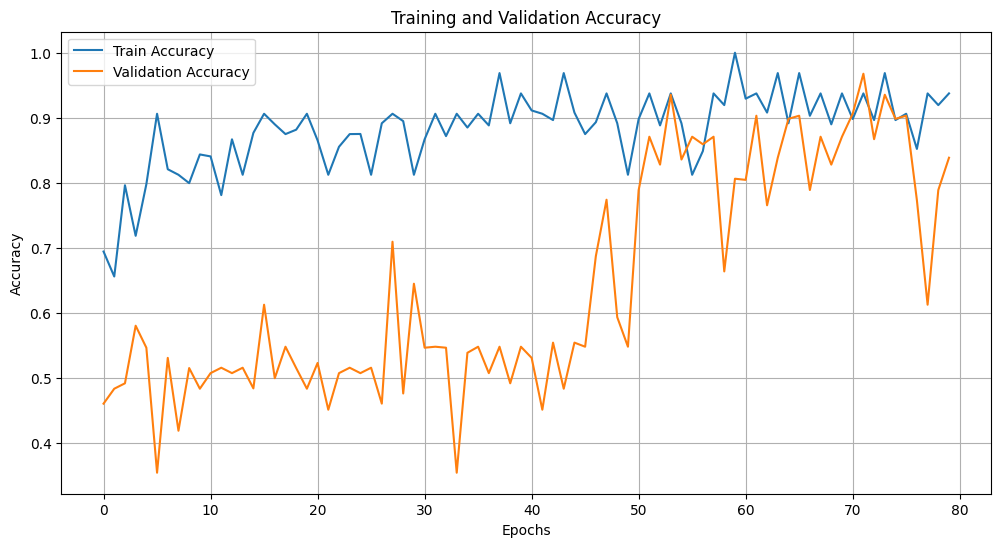

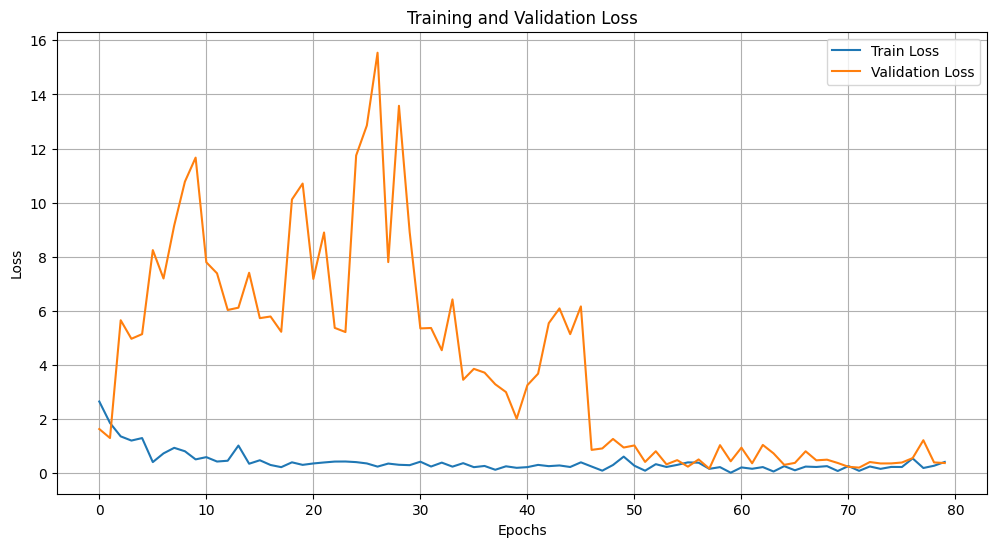

In [8]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
import os

# Define the path to the dataset
base_dir = '/kaggle/input/brain-cancer-detection-mri-images/Dataset'

# Initialize ImageDataGenerators with validation_split
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
    validation_split=0.2 
)

# Create data generators
train_generator = train_datagen.flow_from_directory(
    base_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary',
    subset='training'  # Specify that this is the training subset
)

validation_generator = train_datagen.flow_from_directory(
    base_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary',
    subset='validation'  
)

# Define the CNN model
model = Sequential()

# Convolutional Block 1
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))

# Convolutional Block 2
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))

# Convolutional Block 3
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))

# Convolutional Block 4
model.add(Conv2D(256, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))

# Flatten and Dense Layers
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='binary_crossentropy',
    metrics=['accuracy']
)

# Display the model's architecture
model.summary()

# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    epochs=80,  
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // validation_generator.batch_size
)

# Print training and validation accuracy
print(f"Final training accuracy: {history.history['accuracy'][-1]:.4f}")
print(f"Final validation accuracy: {history.history['val_accuracy'][-1]:.4f}")

# Plot training and validation accuracy
plt.figure(figsize=(12, 6))
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

# Plot training and validation loss
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()
